<a href="https://colab.research.google.com/github/guilherme-prado/imersao-dados-desafio-final/blob/main/Notebooks/Drug_discovery_Guilherme_Prado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug Discovery - Predição de mecanismos de ação possivelmente relacionados a tratamento de ansiedade, depressão e distúrbios alimentares.**

#Sumário
1. Introdução
2. Observações relevantes
3. Preparação dos dados
4. Análise dos dados
5. Introdução de modelos de predição
6. Conclusão
7. Referências

#**1. Introdução**

> Nesse estudo utilizando uma base de dados de mecanismos de ação e suas respectivas expressões gênicas dado uma lista de compostos aplicados em 2 dosagens diferentes em tempos de 24, 48 e 72 horas, desejo checar a acurácia de previsão para mecanismos de ação relacionados com tratamento de ansiedade, depressão e distúrbios alimentares.

> Minha análise, apesar de direcionada aos mecanismos de ação descritos em artigos da Wikipedia sobre os tratamentos listados acima, será bem ingênua pois posso estar excluindo fatores extremamente relevantes para uma análise melhor direcionada.

> Dito isso, minha análise será baseada nos seguintes mecanismos de ação:
* serotonin_receptor_agonist
* serotonin_receptor_antagonist









#**2. Observações relevantes**
> **Mecanismos de ativação** serão chamados de **mda**

> A viabilidade celular não será considerada nesse processo de análise. Um estudo futuro poderia analisar a viabilidade celular e considerar as amostras com maior viabilidade celular.



#**3. Preparação dos dados**


### Passo 1: Carregando bibliotecas e dados que serão utilizados na análise.



In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

sns.set()

url_experimento = 'https://github.com/guilherme-prado/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
url_resultados = 'https://github.com/guilherme-prado/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

experimento = pd.read_csv(url_experimento, compression = 'zip')
resultados = pd.read_csv(url_resultados)


### Passo 2: Verificando que os dados foram carregados corretamente



In [156]:
experimento.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [157]:
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Passo 3: Reformatando colunas que utilizam hífen.

In [158]:
experimento.rename(columns=lambda x: x.replace('-', '_'), inplace=True)
resultados.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

#**4. Análise dos dados**

### Combinando dados da tabela experimento e resultado.
> Para iniciar a análise dos dados, eu vou criar uma tabela com dados combinados que contenham os **mdas relevantes** para esse estudo junto de suas expressões gênicas e viabilidade celular.

### Buscando todos os mdas relacionados com **serotonina**.

In [159]:
r = re.compile(".*serotonin*.")
m_ativ_ser = list(filter(r.match, resultados.columns))
m_ativ_ser

['serotonin_receptor_agonist',
 'serotonin_receptor_antagonist',
 'serotonin_reuptake_inhibitor']

### Abaixo temos um total de ativações dos mdas selecionados.

> Vale notar aqui que nas combinações de ativações de mdas relacionados com serotonina, uma combinação chama a atenção pela sua característica contraditória.
> `serotonin_receptor_agonist` e `serotonin_receptor_antagonist` foram ativados 7 vezes na mesma amostra.

In [160]:
# Total de combinações de de ativações de mdas relacionados com serotonina.
resultados[m_ativ_ser].value_counts()

serotonin_receptor_agonist  serotonin_receptor_antagonist  serotonin_reuptake_inhibitor
0                           0                              0                               23143
                            1                              0                                 391
1                           0                              0                                 229
0                           0                              1                                  38
1                           1                              0                                   7
0                           1                              1                                   6
dtype: int64

In [161]:
# Total de ativações por mda relacionado com serotonina
series_total = resultados[m_ativ_ser].sum(axis=0)
series_total

serotonin_receptor_agonist       236
serotonin_receptor_antagonist    404
serotonin_reuptake_inhibitor      44
dtype: int64

In [162]:
# Criando um dataframe com o total de ativações por mda relacionado com serotonina
serot_total = pd.DataFrame({'mdas':series_total.index, 'total':series_total.values})

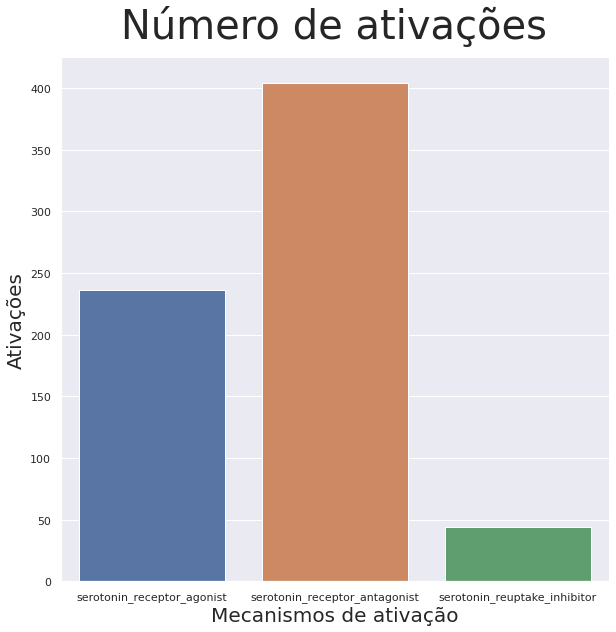

In [163]:
plot = sns.catplot(x='mdas', y='total', kind = 'bar', data=serot_total)
plot.set_xlabels('Mecanismos de ativação',fontsize=20)
plot.set_ylabels('Ativações',fontsize=20)
plot.fig.suptitle('Número de ativações',fontsize=40)
plot.fig.subplots_adjust(top=0.9)
plot.fig.set_figheight(9)
plot.fig.set_figwidth(10)

### Combinando os resultados dos mdas selecionados com os dados experimentais.

In [164]:
experimento[m_ativ_ser] = resultados[m_ativ_ser]
experimento

,id,tratamento,tempo,dose,droga,g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25,g_26,g_27,g_28,g_29,g_30,g_31,g_32,g_33,g_34,...,c_63,c_64,c_65,c_66,c_67,c_68,c_69,c_70,c_71,c_72,c_73,c_74,c_75,c_76,c_77,c_78,c_79,c_80,c_81,c_82,c_83,c_84,c_85,c_86,c_87,c_88,c_89,c_90,c_91,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0

### Checando que nas amostras de controle, os mdas não são ativados

In [165]:
experimento_controle = experimento.query('tratamento == "com_controle"')
for mda in m_ativ_ser:
    ativacoes = experimento_controle[mda].sum()
    if ativacoes > 0 :
        print('Mecanismo de ativação ' + mda + ' foi ativado ' + ativacoes + 'vezes')
    else:
        print('Mecanismo de ativação ' + mda + ' não foi ativado no controle')

Mecanismo de ativação serotonin_receptor_agonist não foi ativado no controle
Mecanismo de ativação serotonin_receptor_antagonist não foi ativado no controle
Mecanismo de ativação serotonin_reuptake_inhibitor não foi ativado no controle


### Preparando os dados para demonstrar diferenças entre médias de expressões gênicas em gráficos de heatmap

In [166]:
media_exp_gen_controle_series = experimento_controle.loc[:,'g_0':'g_771'].mean()
media_exp_gen_controle = pd.DataFrame({'media_nao_ativado':media_exp_gen_controle_series.values})

In [167]:
query = 'tratamento == "com_droga" and serotonin_receptor_agonist == 1 and serotonin_receptor_antagonist == 0'

media_exp_gen_ativ_series = experimento.query(query).loc[:,'g_0':'g_771'].mean()
media_exp_gen_agonist = pd.DataFrame({'media_ativado(serotonin_receptor_agonist)':media_exp_gen_ativ_series.values})
media_exp_gen_agonist['media_nao_ativado(Controle)'] = media_exp_gen_controle['media_nao_ativado']

### **Gráficos comparativos entre controle e amostras com agentes de serotonina ativadas.**

> Nesses gráficos comparativos destacados abaixo é possível notar grupos de expressões gênicas onde as médias de suas expressões diferem muito das médias contidas nas amostras. 

#### Amostras com mda `serotonin_receptor_agonist` ativadas comparadas com o controle.



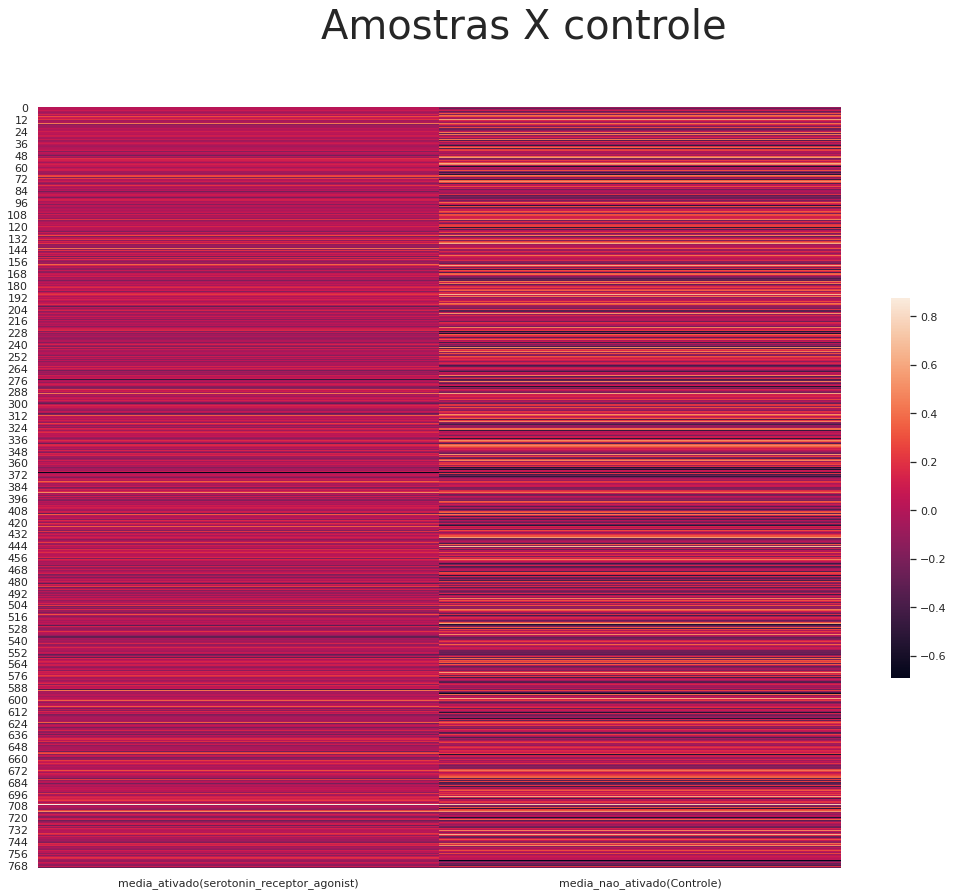

In [168]:
f, ax = plt.subplots(figsize=(18, 14))
f.suptitle('Amostras X controle', fontsize=40)
sns.heatmap(media_exp_gen_agonist, cbar_kws={"shrink": .5})

In [169]:
query = 'tratamento == "com_droga" and (serotonin_receptor_agonist == 0 and serotonin_receptor_antagonist == 1)'

media_exp_gen_ativ_series = experimento.query(query).loc[:,'g_0':'g_771'].mean()
media_exp_gen_antagonist = pd.DataFrame({'media_ativado(serotonin_receptor_antagonist)':media_exp_gen_ativ_series.values})
media_exp_gen_antagonist['media_nao_ativado(Controle)'] = media_exp_gen_controle['media_nao_ativado']

#### Amostras com mda `serotonin_receptor_antagonist` ativadas comparadas com o controle.


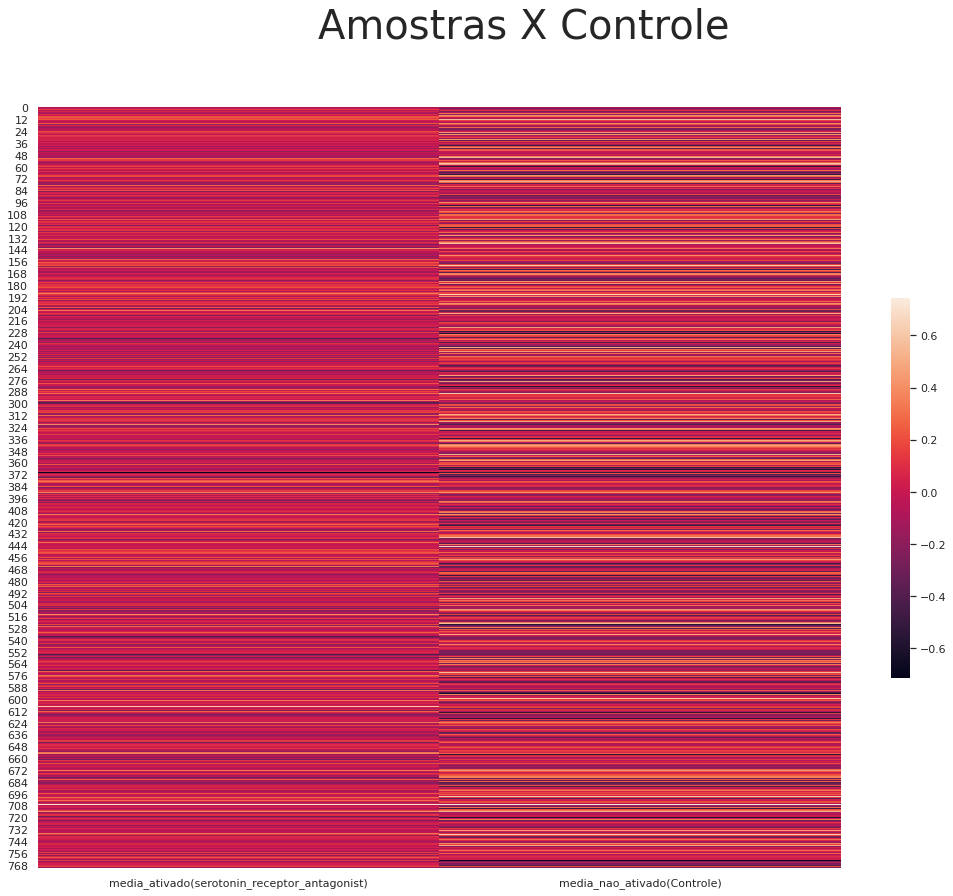

In [170]:
f, ax = plt.subplots(figsize=(18, 14))
f.suptitle('Amostras X Controle', fontsize=40)
sns.heatmap(media_exp_gen_antagonist, cbar_kws={"shrink": .5})

In [171]:
media_exp_gen_antagonist = media_exp_gen_antagonist.drop('media_nao_ativado(Controle)', 1)
media_exp_gen_antagonist['media_ativado(serotonin_receptor_agonist)'] = media_exp_gen_agonist['media_ativado(serotonin_receptor_agonist)']

#### Amostras com mda `serotonin_receptor_antagonist`  ativadas comparadas com Amostras com mda  `serotonin_receptor_agonist` ativadas.

> Aqui é a diferença das médias das expressões gênicas entre os dois mdas (serotonin_receptor_antagonist e serotonin_receptor_agonist), é muito mais sutil, mas ainda assim é possível identificar pequenos grupos onde as médias divergem. É bem curioso notar que, apesar desses mdas terem ações contrárias suas expressões gênicas têm uma média similar com apenas algunas casos de divergência.


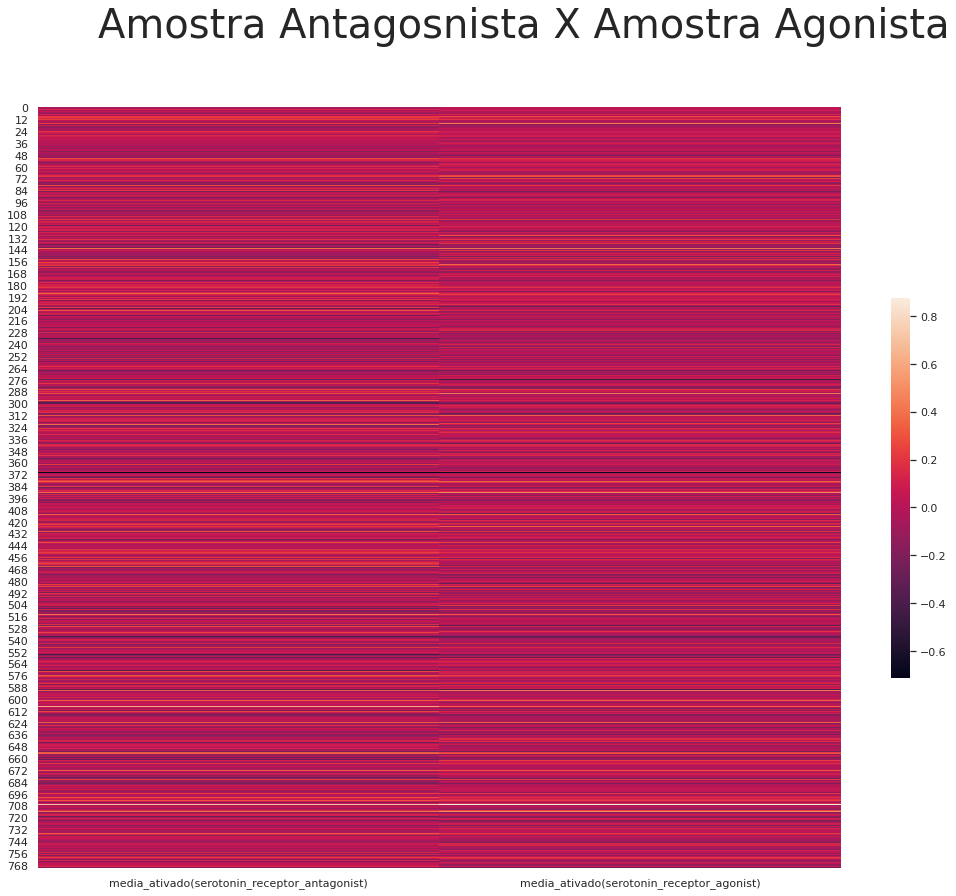

In [172]:
f, ax = plt.subplots(figsize=(18, 14))
f.suptitle('Amostra Antagosnista X Amostra Agonista', fontsize=40)
sns.heatmap(media_exp_gen_antagonist, cbar_kws={"shrink": .5})

##**5. Introdução de modelos de predição**

In [173]:
# Modelos de predição
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# Utilizado para montar uma estrutura de teste e treino para os modelos de predição
from sklearn.model_selection import train_test_split

In [174]:
# Dados para testagem e treinamento dos modelos
x = experimento.loc[:,'g_0':'g_771']
y = experimento['serotonin_receptor_agonist']

# Geração de dados para teste e treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=100)

### Utilizando um modelo de classificação básico para utilizar como base para os outros modelos. DummyClassifier.
> Vale notar que o modelo mais básico de classificação já retorna um média de acertos de aproximadamente 99%.

In [175]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
modelo_dummy.score(x_teste, y_teste)

0.990132269577997

### Utilizando um modelo de regressão logística
> Também alcançamos um alto valor de acurácia (aproximadamente 98%), porém com uma performance menor que o modelo básico que utilizamos anteriormente

In [176]:
modelo_rlogistica = LogisticRegression(max_iter=500)
modelo_rlogistica.fit(x_treino, y_treino)
modelo_rlogistica.score(x_teste, y_teste)

0.9819441528448457

### Utilizando um modelo de árvore de decisão
> Esse modelo atingiu a mesma acurácia do modelo mais simples. Vale notar que a utilização do parâmetro `max_depth` não alterou os resultados em diversos valores testados, apenas aumentou o tempo de processamento para retornar o resultado, por isso foi mantido o valor igual a 1

In [177]:
modelo_arvore = DecisionTreeClassifier(max_depth = 1)
modelo_arvore.fit(x_treino, y_treino)
modelo_arvore.score(x_teste, y_teste)

0.990132269577997

### Modelos que tiveram uma performance abaixo dos modelo básico.
* Linear Regression
* Ridge regression and classification

In [178]:
modelo_linearRegr = LinearRegression()
modelo_linearRegr.fit(x_treino, y_treino)
modelo_linearRegr.score(x_teste, y_teste)

-0.03148319335559746

In [179]:
modelo_ridge = Ridge()
modelo_ridge.fit(x_treino, y_treino)
modelo_ridge.score(x_teste, y_teste)

-0.03147231170109488

##**6. Conclusão**
> Esse foi um estudo inicial para demonstrar que é possível, utilizando os mais adequados modelos de predição, determinar que a partir das expressões gênicas, determinar que os mdas do nosso estudo serão ativados. Verificamos que um modelo de árvore de decisão foi capaz de alcançar aproximadamente 99% de acurácia.

> Verificamos também que é possível, desde que seja feita uma análise mais detalhada, dizer quais expressões gênicas podem estar relacionadas com a ativação desses mdas. 

> Nesse estudo, não foi levado em consideração a viabilidade celular das amostras, mas seria relevante filtrar nos resultados, as amostras que apresentaram maior viabilidade celular.

> 

##**7. Referências**
1. Anti-depressivos: https://en.wikipedia.org/wiki/Antidepressant
2. Ansiolíticos: https://en.wikipedia.org/wiki/Anxiolytic
3. Redução de apetitite: https://en.wikipedia.org/wiki/Anorectic
4. Serotonin_receptor_agonist - https://en.wikipedia.org/wiki/Serotonin_receptor_agonist
5. Machine Learning in Drug Discovery and Development Part 1: A Primer - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7080529/
6. Drug discovery: passado, presente e futuro - https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit
7. Sci-kit Learn - https://scikit-learn.org/stable/index.html
8. A Next Generation Connectivity Map: L1000 platform and the first 1,000,000 profiles - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5990023/